In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Variables descriptions

- survival   :     Survival (0 = No; 1 = Yes)
- pclass      :    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name         :   Name
- sex           :  Sex
- age            : Age
- sibsp     :      Number of Siblings/Spouses Aboard
- parch     :      Number of Parents/Children Aboard
- ticket     :     Ticket Number
- fare        :    Passenger Fare
- cabin        :   Cabin
- embarked      :  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Most of the cabin used by passenger is unknown. It might be difficult to rebuild the missing data based on the available one
- A non neglieable number of passenger have no ge. it is possible to assume the missing data by using the average age of the different categorie of passengers. (for example average of female passenger of first classe)


In [11]:
df.duplicated().sum()

0

No duplicated lines are present on this dataset

In [6]:
print("PClass modalities")
print(df.Pclass.value_counts())
print("\nSibSP modalities")
print(df.SibSp.value_counts())
print("\nParch modalities")
print(df.Parch.value_counts())
print("\nEmbarked modalities")
print(df.Embarked.value_counts())

PClass modalities
3    491
1    216
2    184
Name: Pclass, dtype: int64

SibSP modalities
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch modalities
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Embarked modalities
S    644
C    168
Q     77
Name: Embarked, dtype: int64


SibSP and Parch modalites have several categories that contains very few data, it might be more intereseting to regroup these in a categorie such as "2+"" 

In [12]:
print("Number of unique tickets")
print(df.Ticket.nunique())
print("\nNumber of unique Cabin")
print(df.Cabin.nunique())

Number of unique tickets
681

Number of unique Cabin
147


As their is more passenger than tickets, it can be concluded than several passenger traveled with the same ticket.Most likely Famillies

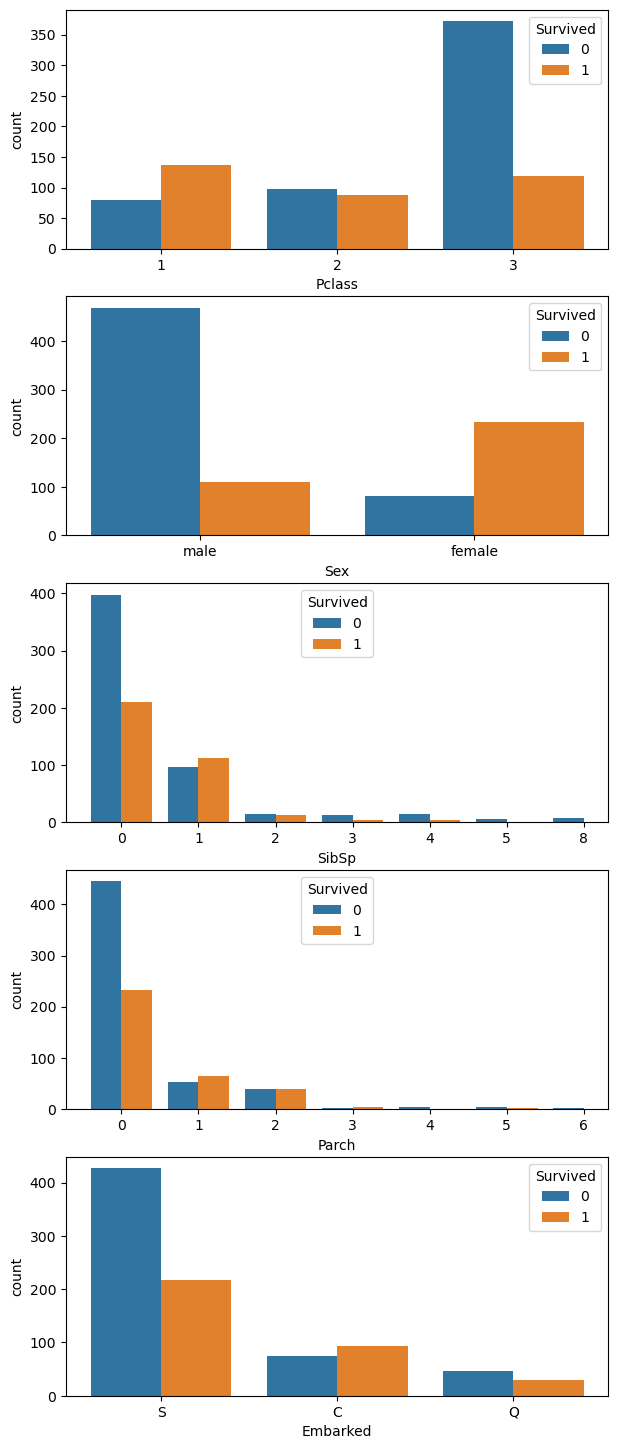

In [70]:
columns = ["Pclass", "Sex", "SibSp","Parch","Embarked"]
plt.figure(figsize = (7,18))
i=1
for cols in columns:
    plt.subplot(len(columns),1,i)
    sns.countplot(x = cols, hue ="Survived", data =df)
    plt.plot()
    i+=1

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

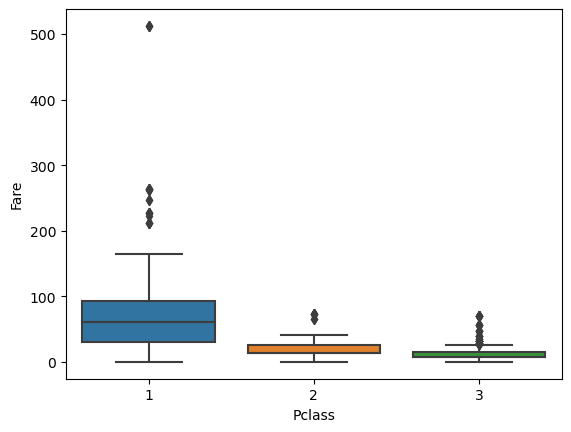

In [13]:
sns.boxplot(x= "Pclass", y = "Fare" , data =df)

Some passengers in class 3 were paying a very expensive far. Maybe the tickets was for several person. Let's check it out: 

In [14]:
df[(df["Fare"] > 50) & (df["Pclass"] == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S


The data above clearly show that the most expensive third class tickets were corresponding to an important group of person
What might be more interessting would be to calculate the fare per personn. For that we need to count the total of person sharing the same ticket and divide the total far by this number:

<AxesSubplot:xlabel='Pclass', ylabel='Fare_per_person'>

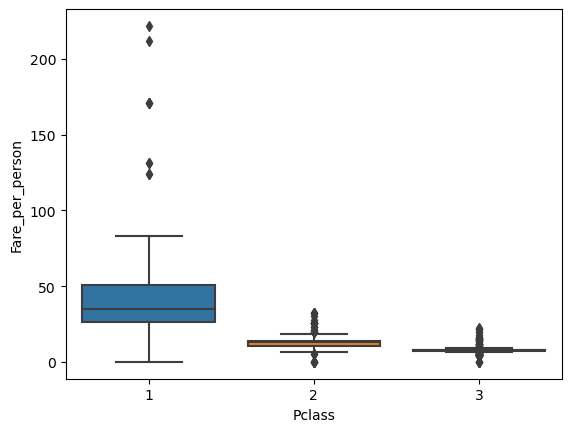

In [15]:
df["Ticket_count"] = df.groupby("Ticket").PassengerId.transform("count")
df["Fare_per_person"] = df["Fare"]/df["Ticket_count"]
sns.boxplot(x= "Pclass", y = "Fare_per_person" , data =df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare_per_person'>

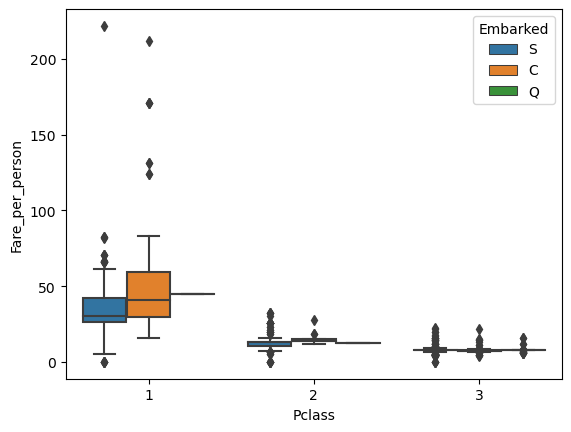

In [23]:
sns.boxplot(x= "Pclass", y = "Fare_per_person", hue = "Embarked" , data =df)

In [28]:
df["Cabin_category"] = df["Cabin"].apply(lambda x : str(x)[0])

<AxesSubplot:xlabel='Embarked', ylabel='Fare_per_person'>

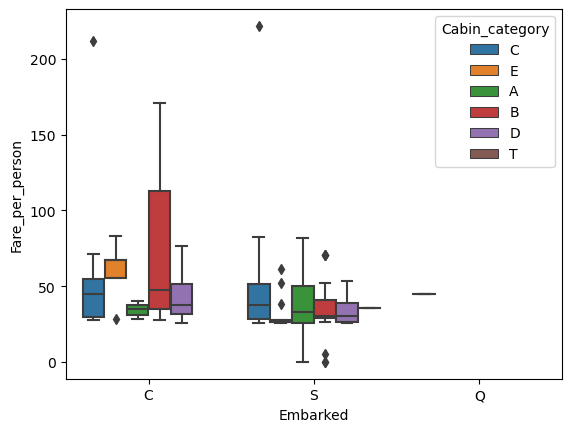

In [38]:
sns.boxplot(x=  "Embarked" , y = "Fare_per_person", hue ="Cabin_category" , data =df[(df["Pclass"] == 1) & (df["Cabin_category"] != "n")])

In [17]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
print(40*70)

2800


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

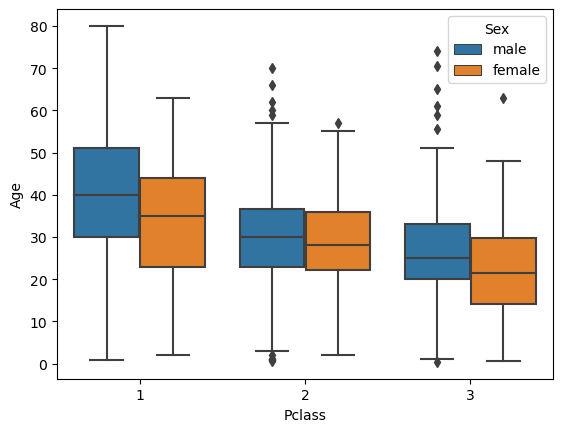

In [19]:
sns.boxplot(x= "Pclass", y = "Age", hue = "Sex", data =df)

The distribution of age is quitte different between Class and sex. This information will be usefull to fill the missing values

In [39]:
df["Familly_members"] = df.SibSp+df.Parch

<AxesSubplot:xlabel='Cabin_category', ylabel='Fare_per_person'>

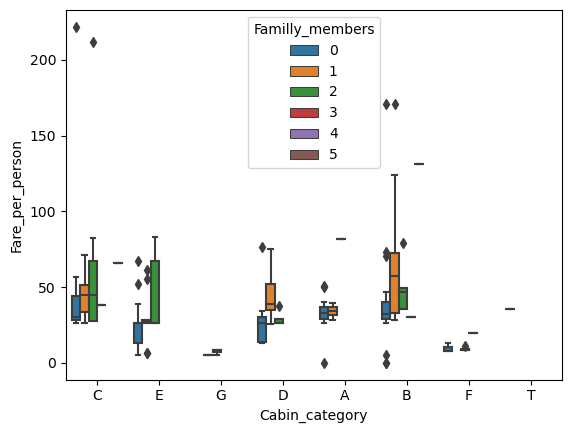

In [44]:
sns.boxplot(x= "Cabin_category", y = "Fare_per_person", hue ="Familly_members"  ,data =df[df["Cabin_category"] != "n"])

# FEATURE ENGINEERING

Tickets have different categorisation, but a pattern we can identify is that the first part of the tickets number could be a combination of letter and number, while the last part is always a number. Let's split-up the tickets informations

<AxesSubplot:>

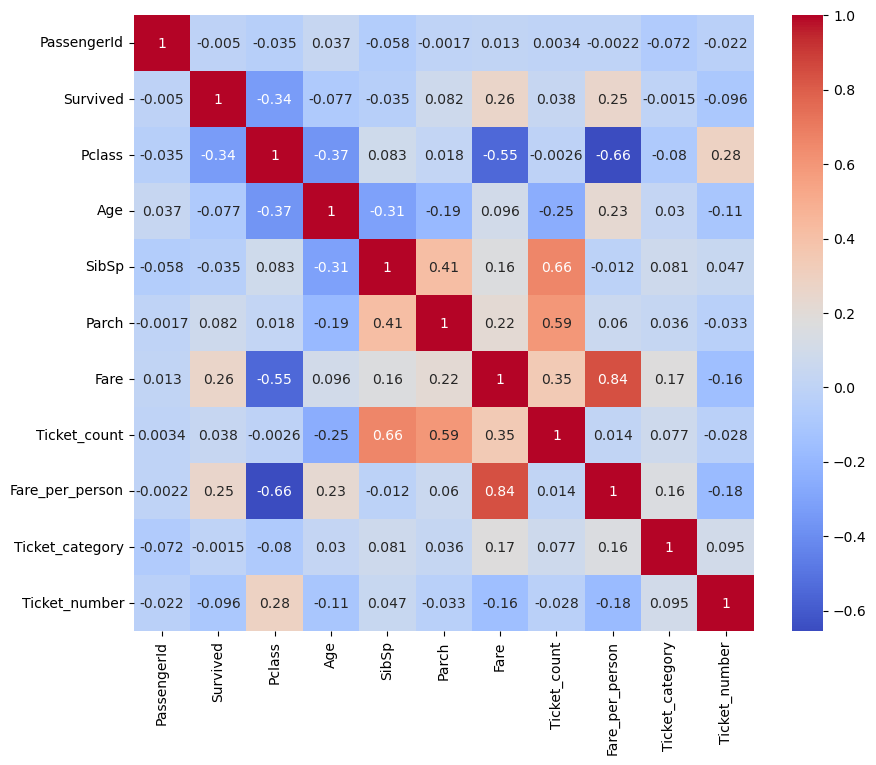

In [37]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm" )